# Inferential statistics applied to a Stroop Effect measurement

This analysis aims to compute descriptive statistics and to perform a statistical test on a dataset based on a psychological phenomenon: the Stroop Effect. This report is structured into four sections: (1) *Introduction*, where the investigation problem is set; (2) *Descriptive Statistics*, where the data is parameterized statistically; (3) *Hypotheses Test*, in which a statistical test is applied to data and its results are reported; and (4) *Conclusion*, where an in-depth discussion on Stroop Effect is made.  

<a id='intro'></a>
## 1. Introduction

<a id='sec1.1'></a>
### 1.1. The Stroop Effect

The Stroop effect is a demonstration of interference in the reaction time of a task. When the name of a color (e.g., "blue", "green", or "red") is printed in a color that is not denoted by the name (e.g., the word "red" printed in blue ink instead of red ink), naming the color of the word takes longer and is more prone to errors than when the color of the ink matches the name of the color. The effect is named after John Ridley Stroop, who first published the effect in English in 1935.

These situations are defined as *congruent*, when the name of color is equivalent to the name, or *incongruent*, when the name denotes to another color, as shown in the following example sets.

** Congruent set of words:**  
> <b><span style="color:green">Green</span> <span style="color:red">Red</span> <span style="color:blue">Blue</span> <span style="color:orange">Orange</span><br>

** Incongruent set of words:**
> <b><span style="color:red">Green</span> <span style="color:green">Red</span> <span style="color:orange">Blue</span> <span style="color:blue">Orange</span><br>

<a id='sec1.2'></a>
### 1.2. Loading Libraries

In [1]:
# Data analysis packages:
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='sec1.3'></a>
### 1.3. Understanding the data
The dataset used in this analysis refers to the time of reading the ink color either for a list of congruent words and for a list of incongruent words. Each line of the dataset corresponds to a different person, in a total of 24 people, as confirmed by the dataset length.

In order to define the hypotheses that will lead this analysis, it is first needed to know which information is available in the dataset (attributes). Thus, the first lines of the dataset are shown below:

In [2]:
## Loading the dataset
data = [[12.079,19.278],[16.791,18.741],[9.564,21.214],[8.630,15.687],[14.669,22.803],[12.238,20.878],[14.692,24.572],[8.987,17.394],[9.401,20.762],[14.480,26.282],[22.328,24.524],[15.298,18.644],[15.073,17.510],[16.929,20.330],[18.200,35.255],[12.130,22.158],[18.495,25.139],[10.639,20.429],[11.344,17.425],[12.369,34.288],[12.944,23.894],[14.233,17.960],[19.710,22.058],[16.004,21.157]]
dataset = pd.DataFrame(data, columns=['Congruent','Incongruent'])
## Printing the number of samples in the dataset:
print('The dataset has {0} samples.'.format(len(dataset)))
## Printing out some few lines:
dataset.head(3)

The dataset has 24 samples.


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214


Once we have understood the phenomenon and the data available, we can then characterize the variables we are working with, as follow:
* **Independent variable**: the independent variable is the one that does not depend on the sample and that are choosen a priori by the experimenter. In fact, it correspond to the variable we are trying to understand through the experiment. In this case, the independent variable is **the condition of the set of words**, i.e. whether the words are congruent or not. Put another way, we can imagine our independent variable *condition* assuming the value 0 when the words are congruents or assuming the value 1 if not.  

* **Dependent variable**: on the other hand, the dependent variable varies accordingly to each sample. In this problem, it refers to **the time to read and say out loud the color in which a set of words is printed**.  

The distributions for each one of the states of our independent variable can then be described as follow, remembering that population refers to all the people and sample refers only to the subjects participating in the experiment:  

* Time to read and say out loud the color of the congruent set of words:  
    - Population: $(\mu_{c}, \sigma_{c})$;  
    - Sample: $(\bar{X}_c, S_{c})$;  
    > - $\mu_{c}$ is the mean time for reading a congruent set of words; 
    > - $\sigma_{c}$ stands for the standard deviation when reading a congruent set of words; 
    > - $\bar{X}_c$ is the sample mean time for reading a congruent set of words; and 
    > - $S_{c}$ is the sample standard deviation when reading a congruent set of words.  
        
* Time to read and say out loud the color of the incongruent set of words:  
    - Population: $(\mu_{i}, \sigma_{i})$;  
    - Sample: $(\bar{X}_i, S_{i})$;  
    > - $\mu_{i}$ is the mean time for reading an icongruent set of words; 
    > - $\sigma_{i}$ stands for the standard deviation when reading an icongruent set of words; 
    > - $\bar{X}_i$ is the sample mean time for reading an icongruent set of words; and 
    > - $S_{i}$ is the sample standard deviation when reading an icongruent set of words.  

<a id='sec1.4'></a>
### 1.4. Hypotheses to be explored

Does the time for reading incongruent words differ from that reading congruent ones?  

First of all, since the dataset we are considering has few samples, i.e. less than 30, we will assume that the population fits into a normal distribution. From this assumption we can then consider the sample mean as equivalent to the population mean. However, once we do not have the standard deviation of the population, it will be appropriate to consider a t-distribution. 

Furthermore, through the t-test we could infer how different the two population means (simbolized as $\mu_c$ and $\mu_i$ for congruent and incongruent set of words, respectively) are from each other, considering the measured samples. 

We know we are dealing with dependent sample (the subject who reads the congruent set of words is the same that reads the incongruent one), but we are interested in testing for an average difference among them. In <a href="#[5]">[5]</a> this approach of testing is also defined as *paired t-Test*.  

In order to do so, we first need to calculate the difference between the variables:

In [3]:
dataset['Difference'] = dataset['Congruent'] - dataset['Incongruent']
dataset.head(3)

,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650


Once we have calculated the difference among the congruent and incongruent distributions, we still can assume it follows a t-distribution having its mean represented by $\mu_d$, which is given by $(\mu_d = \mu_c-\mu_i)$, and its standard deviation represented by $\sigma_d$. In the same way, the difference of the sample distributions has a mean time represented by $\bar{X}_d$ and a standard deviation represented by $S_d$.

We then hypothesize as follow:  
* **Null hypothesis:** the population difference is centered in zero, i.e., the mean time is the same for reading either congruent and incongruent set of words. This definition can be mathematically defined as:  
    $H_0: \mu_d = 0$  
      
* **Alternative hypothesis:** the population difference is nonzero. If we observe the previous few measurements we notice the time is shorter for reading the congruent set of words, thereby we can hypothesize that reading congruent words is faster than reading the incongruent ones. Mathematically it is the same as obtaining a negative difference. Thus our alternative hypothesis can be narrowed to the following condition:  
    $H_a: \mu_d < 0$  

In order to test them we shall run a one-tailed t-test using an arbitrated $\alpha$ level of $0.05$, as it can be seen in <a href="#hypotheses">Section 3</a>.

-------------

<a id='descrStats'></a>
## 2. Descriptive statistics
The term statistics here stands for the characteristics of the sample, in the way we could describe them in terms of its central tendency and variability.  

The Python Pandas library offers a function to generate the descriptive statistics for a given dataset, summarizing its central tendency, dispersion and shape of the dataset's distribution. For numerical data, as it is the case, this function results in the following statistics: *count*, *mean*, *std* for the standard deviation, *min* and *max* values, the lower percentile (*25%*), the median or *50% percentile*, and the upper percentile (*75%*). 

In [4]:
## Obtaining the dataset descriptive statistics:
dataset.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


From the values above we can see that in both sample distributions the *median* is close to the mean value, as it is supposed to be in a normal distribution. Thus it gaves us an idea on how is the central tendency of these distributions. The standard deviation values give us the information on how these distributions are spread out, indicating that the congruent values are closer to their mean. 

These observed descriptive statistics are confirmed in the plot below, where both sample distributions can be visualized. Also, the same observations are valid for the *difference distribution* ($\bar{X}_d$, $S_d$). Despite the outlier measurements in the distribution from *incongruent* word set and the skewness in the *difference*, it can be noticed that all of them follow an approximately normal curve. 

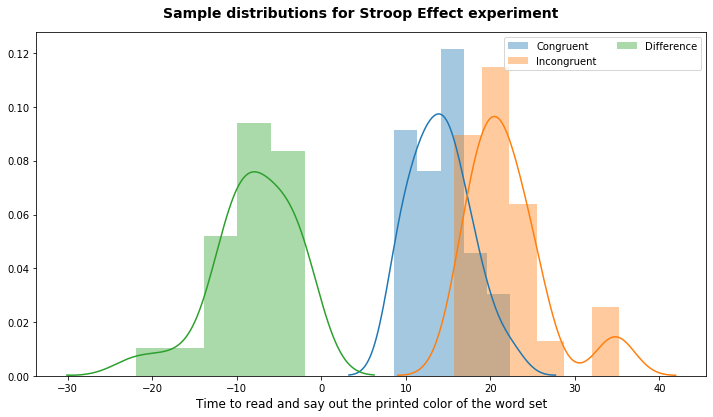

In [5]:
fig1, ax = plt.subplots(figsize=[12,6])  #Defines the graph window size
fig1.subplots_adjust(top=0.92)
plt.suptitle('Sample distributions for Stroop Effect experiment', fontsize=14, fontweight='bold')

sns.distplot(dataset['Congruent'], label='Congruent', ax=ax)
sns.distplot(dataset['Incongruent'], label='Incongruent', ax=ax)
sns.distplot(dataset['Difference'], label='Difference', ax=ax)
ax.legend(ncol=2, loc="upper right", frameon=True)

ax.set_xlabel('Time to read and say out the printed color of the word set', fontsize=12)
plt.show()

The same distributions can be viewed on the boxplot below, which clearly shows the distribution range and highlights the probable outliers.

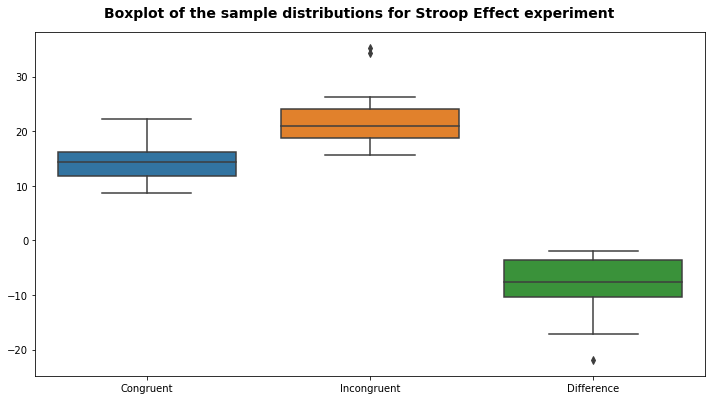

In [18]:
fig2, ax2 = plt.subplots(figsize=[12,6])  #Defines the graph window size
fig2.subplots_adjust(top=0.92)
plt.suptitle('Boxplot of the sample distributions for Stroop Effect experiment', fontsize=14, fontweight='bold')
sns.boxplot(data=dataset, orient='v', ax=ax2)
plt.show()

-------------

<a id='hypotheses'></a>
## 3. Hypotheses Test
In this section we will perform a t-test to evaluate the hypotheses set on  <a href="#sec1.4">Section 1.4</a>.

As stated before, the following definitions must be considered:
* Hypotheses to test:  
  * $H_0: \mu_d = 0$  
  * $H_a: \mu_d < 0$  

* One-tailed t-test with $\alpha$ level of $0.05$ and dependent sample.

#### Calculating degrees of freedom
Since we are considering dependent sample, the degrees of freedom (*df*) are found by the following relation:  
${df} = n -1$, where $n$ is the number of samples.

In [7]:
n = len(dataset)
df = n-1
print('Degrees of freedom: {}'.format(df))

Degrees of freedom: 23


#### Calculating the t-test parameters
To proceed the test, we need then to calculate the sample mean, $\bar{X}_d$, and its respective standard deviation $S_d$:

In [8]:
## Difference mean
Xd = dataset['Difference'].mean()
print('Sample mean = {}'.format(Xd))
## Difference standard deviation
Sd = dataset['Difference'].std()
print('Sample std = {}'.format(Sd))

Sample mean = -7.964791666666664
Sample std = 4.864826910359054


With these values, we can now calculate the *standard error of the mean* as follow:  
${SEM} = S_d / \sqrt{n}$

In [9]:
SEM = Sd / np.sqrt(n)
print('SEM = {}'.format(SEM))

SEM = 0.9930286347783402


Finally, the t-test value is obtained from the relation:  
$t = \frac{\bar{X}_d}{{SEM}}$


In [10]:
t = Xd / SEM
print('t-test = {}'.format(t))

t-test = -8.020706944109957


### Calculating the p-value

Since we have defined an $\alpha$ level, it is know we are considering a *p-value* less than $\alpha$, i.e. $p < 0.05$. However, as this analysis runs over a computational platform, its exact value can be determined through the *stats* module of the *SciPy* library.

In [11]:
from scipy import stats

In [12]:
p = stats.t.cdf(t, df=df)
print('p-value = {0:.9f}'.format(p))

p-value = 0.000000021


In order to check the consistency of the results we have found, we will use a SciPy function to calculate the t-value and p-value:

In [13]:
stats.ttest_rel(dataset['Congruent'],dataset['Incongruent'])

Ttest_relResult(statistic=-8.020706944109959, pvalue=4.1030005857111556e-08)

### Rejecting the null hypothesis

The $t_{critical}$ value is obtained from t-Table and when considering a one-tailed $\alpha = 0.05$, it corresponds to $t_{critical} = -1.714$.  

Since the *t-test* value is much less than *t-critical*, **we reject the null** which means **we found significant statistics** to affirm that people read faster a set of congruent words when compared to incongruent ones, **which in turn is an evidence of the Stroop Effect**.  

 ### Finding the confidence interval

The confidence interval (CI) is calculated from the following relation:  
${CI} = \bar{X}_d \pm {ME}$,  

where ${ME}$ stands for margin of error and is calculated as follow:  
${ME} = t_{critical}*{SEM}$

In [14]:
t_critical = 1.714
ME = t_critical*SEM
CI = (Xd-ME, Xd+ME)
print('Confidence interval: ({0:.2f}, {1:.2f})'.format(CI[0], CI[1]))

Confidence interval: (-9.67, -6.26)


**The CI above means that in average people read the congruent set of words almost 10 to 6 seconds faster than the incongruent one**. 

-----------

<a id='conclusions'></a>
## 4. Conclusions
Regarding the *Stroop Effect*, it can be understood as an evidence in experimental psychology that a selective attention by properties is either nonexistent or incomplete. This is due to early experiments that seemed to indicate that if an object is attended, some of its properties would be processed in an automatic way, even when the observer were trying to ignore them. The findings from Stroop Effect bring evidences that selective attention to color may not be possible after all. The Stroop interference also occurs when subjects are asked to name an object that is drawn in outline around the name of a different object, for example. 

In this analysis we presented the Stroop Effect and applyed a t-test to collect statistic evidence to support this perceptive phenomenon. In doing so, we have gone through the steps necessary to test a hypothesis as well as gain confidence that the method can be valid even for a small number of samples, provided certain conditions. 

--------------